In [132]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [133]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
os.chdir('/content/gdrive/MyDrive/CourseDA')

In [135]:
os.listdir()

['train_mobile_price.csv',
 'test_mobile_price.csv',
 'healthcare-dataset-stroke-data.csv',
 'diabetes_prediction_dataset_.csv',
 'diabetes_prediction_dataset.csv',
 'movies_metadata.csv',
 'ratings_small.csv',
 'AIDS_Classification_50000.csv',
 'heart-dt.csv',
 'Churn_Modelling.csv']

In [136]:
churn=pd.read_csv('Churn_Modelling.csv')

# **Tentang Kumpulan Data**
**Keterangan:**\
Dataset ini berisi informasi tentang nasabah bank dan status churn mereka, yang menunjukkan apakah mereka sudah keluar dari bank atau belum. Cocok untuk mengeksplorasi dan menganalisis faktor-faktor yang mempengaruhi churn nasabah di lembaga perbankan dan untuk membangun model prediktif guna mengidentifikasi nasabah yang berisiko churn.\
**Fitur**:\
RowNumber: Nomor urut yang ditetapkan untuk setiap baris dalam kumpulan data.\
CustomerId: Pengidentifikasi unik untuk setiap pelanggan.\
Nama Keluarga: Nama belakang pelanggan.\
CreditScore: Skor kredit pelanggan.\
Geografi: Lokasi geografis pelanggan (misalnya, negara atau wilayah).\
Jenis Kelamin: Jenis kelamin pelanggan.\
Usia: Usia pelanggan.\
Jangka waktu: Jumlah tahun nasabah telah bekerja di bank.\
Saldo: Saldo akun pelanggan.\
NumOfProducts: Jumlah produk bank yang dimiliki nasabah.\
HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (biner: ya/tidak).\
IsActiveMember: Menunjukkan apakah pelanggan adalah anggota aktif (biner: ya/tidak).\
Estimasi Gaji: Perkiraan gaji pelanggan.\
Exited: Menunjukkan apakah nasabah sudah keluar dari bank (biner: ya/tidak).\

**Kontribusi:**\
Kumpulan data ini dapat digunakan untuk analisis data eksplorasi guna memahami faktor-faktor yang mempengaruhi churn nasabah di bank.\
Ini juga dapat digunakan untuk membuat model pembelajaran mesin untuk memprediksi churn pelanggan berdasarkan fitur yang diberikan.

In [137]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [138]:
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [139]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [140]:
churn.duplicated().sum()

0

In [141]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

🧑 : dataset aman nich\
🦓: mang ea\
🧟: sikatt cok

In [142]:
churn['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

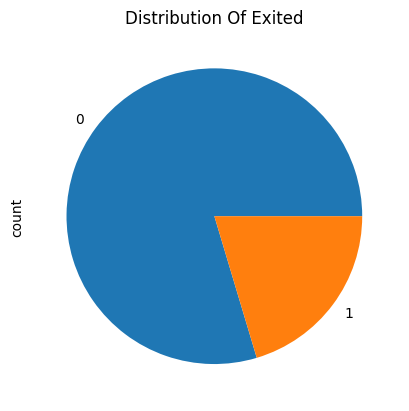

In [143]:
churn['Exited'].value_counts().plot(kind='pie')
plt.title('Distribution Of Exited')
plt.show()

informasi keaktifan nasabah berdasarkan geography 🐝

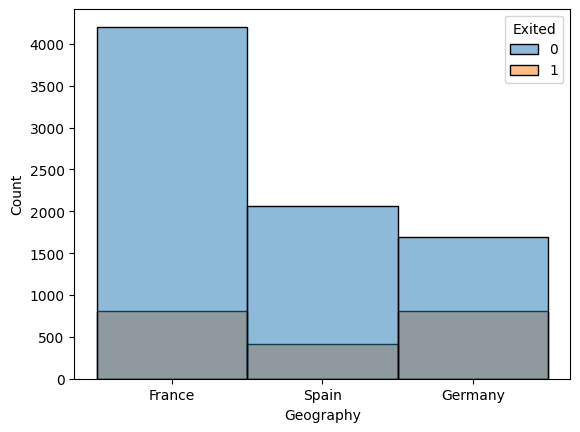

In [144]:
sns.histplot(churn,
                x='Geography',
                hue='Exited')
plt.show()

In [145]:
churn_france=churn[(churn['Exited']==1)&(churn['Geography']=='France')]
churn_spain=churn[(churn['Exited']==1)&(churn['Geography']=='Spain')]
churn_germany=churn[(churn['Exited']==1)&(churn['Geography']=='Germany')]

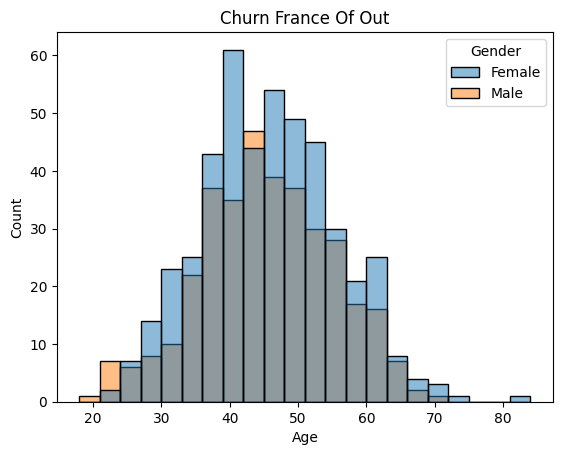

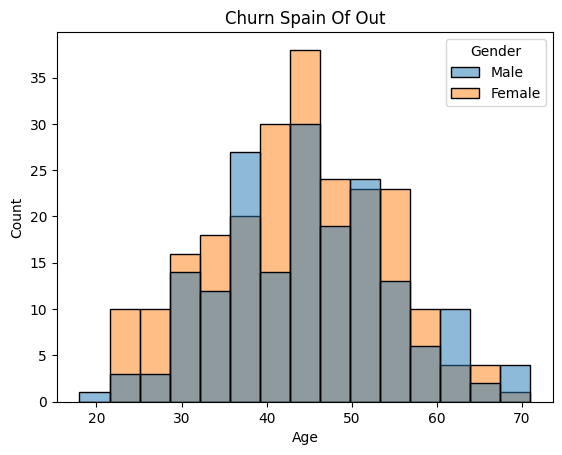

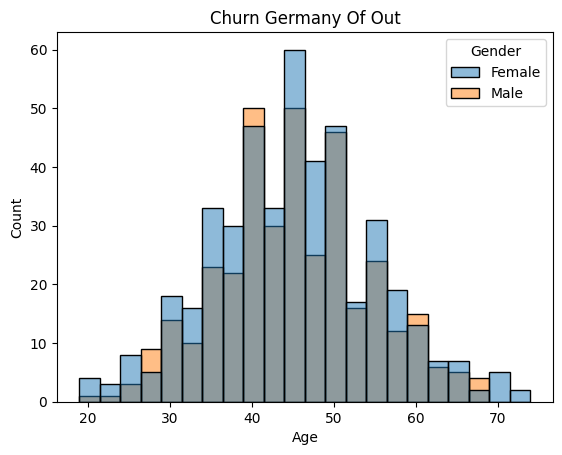

In [146]:
sns.histplot(churn_france,
                x='Age',
                hue='Gender')
plt.title('Churn France Of Out')
plt.show()

sns.histplot(churn_spain,
                x='Age',
                hue='Gender')
plt.title('Churn Spain Of Out')
plt.show()

sns.histplot(churn_germany,
                x='Age',
                hue='Gender')
plt.title('Churn Germany Of Out')
plt.show()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [148]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [149]:
label_encoder=preprocessing.LabelEncoder()
churn['Surname']=label_encoder.fit_transform(churn['Surname'])
churn['Geography']=label_encoder.fit_transform(churn['Geography'])
churn['Gender']=label_encoder.fit_transform(churn['Gender'])
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [150]:
def select_columns(df: pd.DataFrame, features:list, target:list='Exited'):
  X = df[features]
  y = df[target]
  return X, y

In [151]:
features=['CreditScore', 'Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
X, y = select_columns(churn, features=features)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,  random_state=42)

In [152]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(X_train)

MinMaxScaler()

In [153]:
def scaling(df, scaler):
  scaled_array=scaler.transform(df)
  scaled_df=pd.DataFrame(df, columns=scaler.get_feature_names_out())
  return scaled_df

X_train_scaled=scaling(X_train, minmax)
X_test_scaled=scaling(X_test, minmax)

In [154]:
X_train_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,1,32,6,0.00,2,1,1,179093.26
1561,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [155]:
X_test_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,1,1,32,3,96709.07,2,0,0,41788.37
4684,623,0,1,43,1,0.00,2,1,1,146379.30
1731,601,2,0,44,4,0.00,2,1,0,58561.31
4742,506,1,1,59,8,119152.10,2,1,1,170679.74
4521,560,2,0,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,1,0,53,5,98268.84,1,0,1,45038.29
8285,609,0,1,25,10,0.00,1,0,1,109895.16
7853,730,0,0,47,7,0.00,1,1,0,33373.26
1095,692,0,1,29,4,0.00,1,1,0,76755.99


In [156]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [157]:
y_train_predict_dt=dt.predict(X_train)
y_test_predict_dt=dt.predict(X_test)

In [158]:
pd.crosstab(y_test, y_test_predict_dt)

col_0,0,1
Exited,,
0,1360,247
1,187,206


In [159]:
from sklearn.metrics import confusion_matrix, classification_report

In [160]:
print(confusion_matrix(y_test, y_test_predict_dt))

[[1360  247]
 [ 187  206]]


In [161]:
print(classification_report(y_test, y_test_predict_dt))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.69      0.67      2000
weighted avg       0.80      0.78      0.79      2000



In [162]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [163]:
print('precision_score:', precision_score(y_test, y_test_predict_dt))
print('f1_score:', f1_score(y_test, y_test_predict_dt))
print('accuracy_score:', accuracy_score(y_test, y_test_predict_dt))
print('recall_score:', recall_score(y_test, y_test_predict_dt))

precision_score: 0.45474613686534215
f1_score: 0.48699763593380613
accuracy_score: 0.783
recall_score: 0.5241730279898219


In [164]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [165]:
dt_params = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1, min_samples_split=3)
dt_params.fit(X_train_scaled, y_train)

DecisionTreeClassifier(min_samples_split=3)

In [166]:
print(classification_report(y_test, dt_params.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.44      0.49      0.46       393

    accuracy                           0.78      2000
   macro avg       0.65      0.67      0.66      2000
weighted avg       0.79      0.78      0.78      2000



In [167]:
dt_params = {
    'criterion' : ['gini','entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
}

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
dt_new=GridSearchCV(DecisionTreeClassifier(), dt_params)
dt_new.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [170]:
dt_new.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [171]:
dt_new.best_score_

0.789875